<a href="https://colab.research.google.com/github/surajpandey11/Decision_tree-regressor-/blob/main/Copy_of_M3W2D3_Assignment_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [138]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
dataset=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 3/Week 1/Day 2/housing.csv')

In [141]:
dataset_df=dataset[' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'].str.split(" +",expand=True)
dataset_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
1,,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
2,,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
3,,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
4,,0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
501,,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
502,,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
503,,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


In [142]:
dataset_df = dataset_df.drop([0],axis=1)

In [143]:
dataset_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
1,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
2,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
3,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
4,0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
501,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
502,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
503,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


In [144]:
for column in dataset_df:
  dataset_df[column]=pd.to_numeric(dataset_df[column],errors='coerce')

In [145]:
dataset_df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [146]:
new_row={'CRIM':0.00632,'ZN':18.00,'INDUS':2.310,'CHAS':0,'NOX':0.5380,'RM':0.5380,'AGE':65.20 ,'DIS':4.0900,'RAD':4.0900,'TAX':296.0,'PTRATIO':15.30,'B':396.90,'LSTAT': 4.98,'MEDV':24.00}

In [147]:
dataset_df = dataset_df.append(new_row, ignore_index=True)
dataset_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.00,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.00,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.00,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.00,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.00,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.00,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.00,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.00,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.00,273.0,21.0,396.90,7.88,11.9


In [148]:
# dataset_df=datset_df1
dataset_df[dataset_df['MEDV'].isnull()]=21.95

In [149]:
dataset_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611686,13.706126,11.547648,2.41166,2.825590,7.997119,60.904150,5.954533,9.336739,339.504545,18.642292,332.701344,12.563300,23.558300
std,6.769019,23.164937,7.362986,6.76470,6.617632,4.875264,29.802313,5.876234,8.354600,180.340059,2.373267,125.525719,6.663042,8.342912
min,0.006320,0.000000,0.460000,0.00000,0.385000,0.538000,2.900000,1.129600,1.000000,21.950000,12.600000,0.320000,1.730000,6.300000
25%,0.082045,0.000000,5.190000,0.00000,0.449000,5.961000,32.000000,2.430575,4.000000,254.000000,17.400000,364.995000,6.950000,19.000000
50%,0.256510,0.000000,9.690000,0.00000,0.538000,6.318000,65.250000,3.925850,5.000000,307.000000,19.050000,390.660000,11.395000,21.950000
75%,3.677082,21.950000,18.100000,0.00000,0.647000,6.949000,89.975000,6.332075,21.950000,403.000000,20.200000,395.615000,17.407500,25.000000
max,21.950000,100.000000,27.740000,21.95000,21.950000,21.950000,100.000000,21.950000,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [150]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [151]:
X= dataset_df.iloc[:,0:-1]
y=dataset_df.iloc[:,-1]

In [152]:
X_training, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0,shuffle=True)

In [153]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0, max_leaf_nodes=15)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=15,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [154]:
y_train_pred = regressor.predict(X_training)
y_test_pred= regressor.predict(X_test)

In [155]:
mean_squared_error(y_train, y_train_pred)

8.209763236526047

In [156]:
mean_squared_error(y_test, y_test_pred)

6.284880352230082

In [157]:
math.sqrt(mean_squared_error(y_train, y_train_pred))

2.8652684405699316

In [158]:
math.sqrt(mean_squared_error(y_test, y_test_pred))

2.5069663643994273

In [159]:
r2_score(y_train, y_train_pred)

0.8849303412588091

In [160]:
r2_score(y_test, y_test_pred)

0.898657919012243

Plot of actual test and predicted test dataset

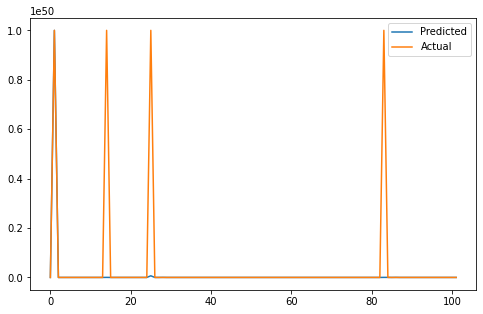

In [164]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_test_pred))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

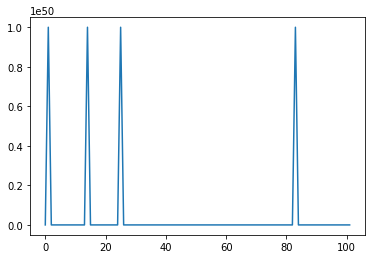

In [162]:
plt.plot(10**(np.array(y_test)))

Plot of actual train and predicted train dataset

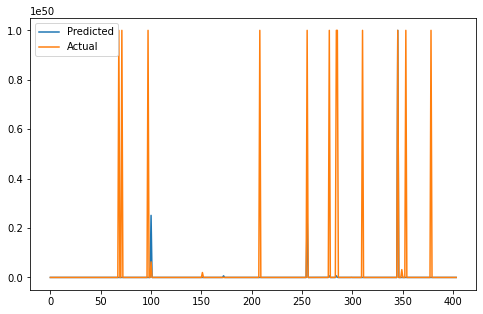

In [163]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_train_pred))
plt.plot(10**(np.array(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

In the starting wfen i did not take the max. leaf value then my model is over fitted  and for that i think i have to do pruning but did not know the pruning so i have chane the max_leaf_size value to 15 and getting the value of r_square is 0.89. 